# Supervised learning text classification model in Python.

This can be seen as a text classification problem. Text classification is one of the widely used natural language processing (NLP) applications in different business problems.

## Dataset

It consists of 2.225 documents from the BBC news website corresponding to stories in five topical areas from 2004 to 2005. These areas are:
<ul>
    <li>Business</li>
    <li>Entertainment</li>
    <li>Politics</li>
    <li>Sport</li>
    <li>Tech</li>
</ul>

## Import necessary libraries

In [1]:
# Lets import some packages
import nltk
#nltk.download('stopwords') #if not installed
#nltk.download('wordnet') #if not installed
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
#import spacy
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm.notebook import tqdm
from tqdm.notebook import tqdm

In [2]:
train_df = pd.read_csv("BBC News Train.csv")
test_df = pd.read_csv("BBC News Test.csv")
sample_sol_df = pd.read_csv("BBC News Sample Solution.csv")

## Explanatory data analysis

Numer of classes: 5 clases

In [3]:
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
train_df['Text'][3]

'lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets  research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size  onboard memory or the chip inside  shows an in-depth study by handset maker ericsson.  historically in the industry there has been too much focus on using technology   said dr michael bjorn  senior advisor on mobile media at ericsson s consumer and enterprise lab.  we have to stop saying that these technologies will change their lives   he said.  we should try to speak to consumers in their own language and help them see how it fits in with what they are doing   he told the bbc news website.  for the study  ericsson interviewed 14 000 mobile phone owners on the ways they use their phone.  people s habits remain the

In [5]:
train_df['Category'][3]

'tech'

In [6]:
sample_sol_df.head()

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [8]:
train_df.Category.value_counts().to_frame()

,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


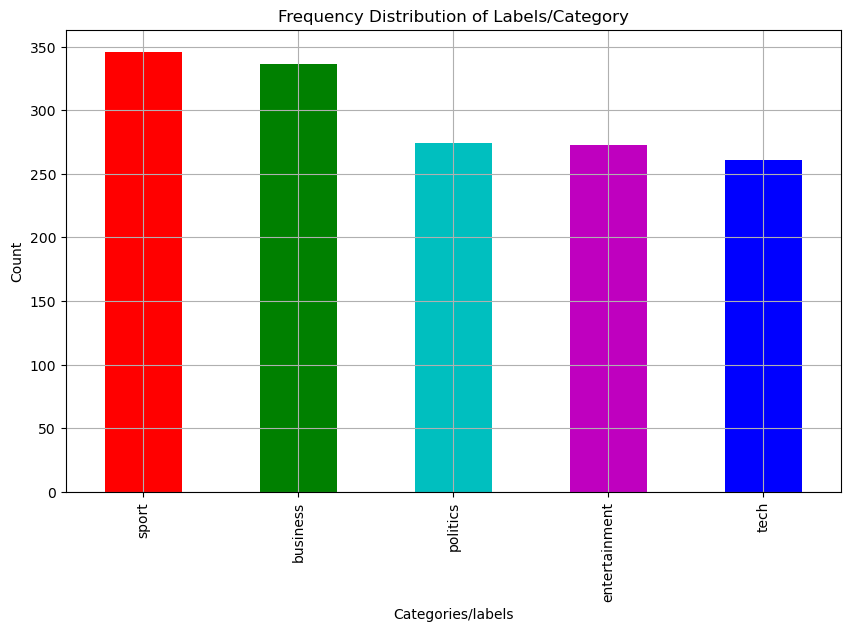

In [9]:
news_cat = train_df['Category'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['r','g','c','m','b']
news_cat.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Categories/labels")
plt.ylabel("Count")
plt.title("Frequency Distribution of Labels/Category")
plt.show()

In [10]:
train_df.shape

(1490, 3)

In [11]:
test_df.shape

(735, 2)

In [12]:
train_df.shape[0] + test_df.shape[0]

2225

## WordCloud

In [13]:
#conda install -c conda-forge wordcloud
#pip install wordcloud

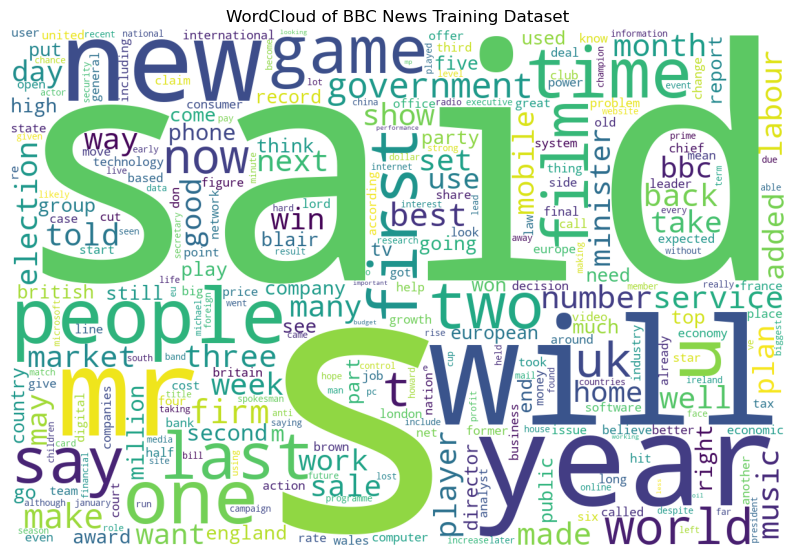

In [14]:
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
wordcloud = WordCloud(max_words=300, width=1200, height=800, background_color='white',
                        collocations=False).generate(" ".join(train_df['Text']))
plt.grid(None)
plt.title("WordCloud of BBC News Training Dataset")
plt.axis('off')
plt.imshow(wordcloud)

## Text cleansing / wrangling / text normalization

Text normalization is defined as a process that consists of a series of steps that should be followed to wrangle, clean, and standardize textual data into a form that could be consumed by other NLP and analytics systems and applications as input

Besides tokenization, various other techniques include <code>cleaning text, case conversion, correcting spellings, removing stopwords and other unnecessary terms, stemming, lemmatization, etc.</code> Text normalization is also often called <i>text cleansing or wrangling</i>.

All machine learning (ML) algorithms, be they supervised or unsupervised techniques, usually work with input features that are numeric in nature. 

Usually text corpora and other textual data in their native raw format are not well formatted and standardized, and of course, we should expect this—after all, text data is highly unstructured! Text processing, or to be more specific, pre-processing, involves using a variety of techniques to convert raw text into welldefined sequences of linguistic components that have standard structure and notation

Often additional metadata is also present in the form of annotations to give more meaning to the text components like tags. The following list gives us an idea of some of the most popular text pre-processing techniques

Preprocess data by:
<ul>
    <li>Replcing special characters with space</li>
    <li>Replcing multiple spaces with a single space</li>
    <li>Convert all the text to lower case</li>
    <li>Tokenization</li>
    <li>Stemming</li>
    <li>Lemmatization</li>
    <li>Remove all stop words</li>    
</ul>

Text processing also helps in cleaning and standardization of the text, which helps in analytical systems, like increasing the accuracy of classifiers.

### a) Tokenization

 A paragraph of text or a text document has several components including sentences that can be further broken down into clauses, phrases, and words. The most popular tokenization techniques include sentence and word tokenization, which are
used to break down a text corpus into sentences, and each sentence into words. Thus, tokenization can be defined as the process of breaking down or splitting textual data into smaller meaningful components called tokens. 

<b>Sentence tokenization</b> is the process of splitting a text corpus into sentences that act as the first level of tokens which the corpus is comprised of. This is also known as sentence segmentation, because we try to segment the text into meaningful sentences. Any text corpus is a body of text where each paragraph comprises several sentences

<b>Word tokenization</b> is the process of splitting or segmenting sentences into their constituent words. A sentence is a collection of words, and with tokenization we essentially split a sentence into a list of words that can be used to reconstruct the sentence. Word tokenization is very important in many processes, especially in cleaning
and normalizing text where operations like stemming and lemmatization work on each individual word based on its respective stems and lemma. 

<b>b) Expanding Contractions</b>
Contractions are shortened version of words or syllables. They exist in either written or spoken forms. Shortened versions of existing words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word. Usually contractions are avoided when used in formal writing, but informally, they are used quite extensively. By nature, contractions do pose a problem for NLP and text analytics because, to start with, we have a special apostrophe character in the word. Plus we have two or more words represented by a contraction, and this opens a whole new can of worms when we try to tokenize this or even standardize the words.

<b>c) Removing Special Characters</b>
One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization

The main reason for doing so is because often punctuation or special characters do not have much significance when we
analyze the text and utilize it for extracting features or information based on NLP and ML. We will implement both types of special characters removal, before and after tokenization

<b>d) Case Conversions</b>

Often we want to modify the case of words or sentences to make things easier, like matching specific words or tokens. Usually there are two types of case conversion operations that are used a lot. These are lowercase and uppercase conversions, where a body of text is converted completely to lowercase or uppercase. There are other forms also, such as sentence case or proper case. Lowercase is a form where all the letters of the text are small letters, and in uppercase they are all capitalized

<b>e) Removing Stopwords</b>

Stopwords, sometimes written stop words, are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the, me, and so on are stopwords. There is no universal or exhaustive list of stopwords. Each domain or language may have its own set of stopwords.

<b>f) Correcting Words</b> e.g. Repeating Characters.

One of the main challenges faced in text normalization is the presence of incorrect words in the text. The definition of incorrect here covers words that have spelling mistakes as well as words with several letters repeated that do not contribute much to its overall significance. To illustrate some examples, the word finally could be mistakenly written as
fianlly, or someone expressing intense emotion could write it as finalllllyyyyyy. The main objective here would be to standardize different forms of these words to the correct form so that we do not end up losing vital information from different tokens in the text. This section covers dealing with repeated characters as well as correcting spellings.


<b>g) Correcting Spellings</b>

Another problem we face is incorrect or wrong spellings that occur due to human error,or even machine-based errors you may have seen thanks to features like auto-correcting text. There are various ways of dealing with incorrect spellings where the final objective is to have tokens of text with the correct spelling. This section will talk about one of the
famous algorithms developed by Peter Norvig, the director of research at Google. You can find the complete detailed post explaining his algorithm and findings at http://norvig.com/spell-correct.html.

The main objective of this exercise is that, given a word, we need to find the most likely word that is the correct form of that word. The approach we would follow is to generate a set of candidate words that are near to our input word and select the most likely word from this set as the correct word. We use a corpus of correct English words in this context to identify the correct word based on its frequency in the corpus from our final set of candidates with the nearest distance to our input word. This distance, which measures how near or far a word is from our input word, is also called <code>edit distance</code>. The input corpus we use is a file containing several books from the Gutenberg corpus and also
a list of most frequent words from Wiktionary and the British National Corpus. 

<b>h) Stemming</b>

Understanding the process of stemming requires understanding what word stems represent. Chapter 1 talked about morphemes, the smallest independent unit in any natural language. Morphemes consist of units that are stems and affixes. Affixes are units like prefixes, suffixes, and so on, which are attached to a word stem to change its meaning or create a new word altogether. <code>Word stems are also often known as the base form of a word, and we can create new words by attaching affixes to them in a process known as inflection. The reverse of this is obtaining the base form of a word from its inflected form, and this is known as stemming.</code>

Consider the word JUMP. You can add affixes to it and form new words like JUMPS, JUMPED, and JUMPING. In this case, the base word JUMP is the word stem. If we were to carry out stemming on any of its three inflected forms, we would get back the base form.

Stemming helps us in
standardizing words to their base stem irrespective of their inflections, which helps many applications like classifying or clustering text, and even in information retrieval. Search engines make use of such techniques extensively to give better and more accurate results irrespective of the word form.

<img src="img/pic.png" width="350" height="450">



<b>i) Lemmatization</b>

The process of lemmatization is very similar to stemming—you remove word affixes to get to a base form of the word. But in this case, this base form is also known as the root word, but not the root stem. The difference is that the root stem may not always be a lexicographically correct word; that is, it may not be present in the dictionary. The root word, also known as the lemma, will always be present in the dictionary.

The lemmatization process is considerably slower than stemming because an additional step is involved where the root form or lemma is formed by removing the affix from the word if and only if the lemma is present in the dictionary. 

In [15]:
from nltk.corpus import wordnet

In [16]:
def remove_repeated_characters(tokens): #e.g. finnnallly
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'    
    return repeat_pattern.sub(match_substitution, tokens)

In [17]:
a = remove_repeated_characters('Fiinallly')
print(a)

Fiinally


In [18]:
#pip install pattern

In [19]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
#from pattern.en import suggest
from nltk.corpus import wordnet

#loading_the_stop_words_from_nltk_library_
stop_words = set(stopwords.words('english'))#e.g. an apple => "an" is a stop word. a book => "a" is a stop word

def text_preprocessing(total_text):
    if type(total_text) is not int:
        string = ""
        
        #replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
              
        #replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting all the chars into lower case
        total_text = total_text.lower()
        
        #word tokenization
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(total_text)  
        
        #Stemming
        stem_words=[stemmer.stem(w) for w in tokens]
                
        #Lemmatization
        lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
                
        for x in range(len(lemma_words)):
            #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not lemma_words[x] in stop_words:
                
                #Repeating Characters
                #lemma_words = remove_repeated_characters(lemma_words[x])
                
                #Correcting incorrect or wrong spellings
                #lemma_words = suggest(lemma_words)
                
                string += lemma_words[x] + " "         
        return string

In [20]:
df_clean_train = text_preprocessing(train_df['Text'][0])

In [21]:
train_df['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [22]:
df_clean_train

'worldcom ex bos launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit cynthia cooper worldcom ex head intern account alert director irregular account practic u telecom giant 2002 warn led collaps firm follow discoveri 11bn 5 7bn account fraud mr ebber ha plead guilti charg fraud conspiraci prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002 said andersen given green light procedur practic use worldcom mr ebber lawyer said wa unawar fraud argu auditor alert ani problem cooper also said dure sharehold meet mr ebber often pas technic question compani financ chief give onli brief answer prosecut star wit former worldcom financi chief scott sullivan ha said mr ebber order account adjust firm tell hit book howev cooper said m

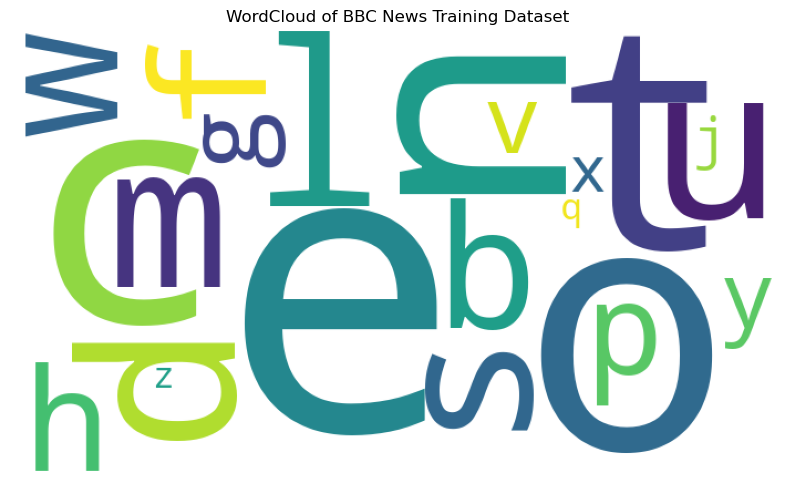

In [23]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(max_words=300, width=700, height=400, background_color='white',
                        collocations=False).generate(" ".join(df_clean_train))
plt.grid(None)
plt.title("WordCloud of BBC News Training Dataset")
plt.axis('off')
plt.imshow(wordcloud)

In [24]:
#pip install pattern

In [25]:
#from pattern.en import suggest
#suggest('finaal')

In [26]:
for index, row in train_df.iterrows():
    if type(row['Text']) is str:
        text_preprocessing(row['Text'])
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",index)

In [27]:
train_df['Text'][3]

'lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets  research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size  onboard memory or the chip inside  shows an in-depth study by handset maker ericsson.  historically in the industry there has been too much focus on using technology   said dr michael bjorn  senior advisor on mobile media at ericsson s consumer and enterprise lab.  we have to stop saying that these technologies will change their lives   he said.  we should try to speak to consumers in their own language and help them see how it fits in with what they are doing   he told the bbc news website.  for the study  ericsson interviewed 14 000 mobile phone owners on the ways they use their phone.  people s habits remain the

In [28]:
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# Splitting dataset: train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train = train_df
y_train = train_df['Category']

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)

In [30]:
X_train.head()

,ArticleId,Text,Category
209,760,gm pays $2bn to evade fiat buyout general moto...,business
582,1039,apple makes blogs reveal sources apple has won...,tech
504,733,gb select holmes for double bid kelly holmes h...,sport
160,344,blair returns from peace mission prime ministe...,politics
759,890,mobiles rack up 20 years of use mobile phones ...,tech


## Feature Extraction 

Usually extracted features are fed into ML algorithms for learning patterns that can be applied on future new data points for getting insights. These algorithms usually expect features in the form of numeric vectors because each algorithm is at heart a mathematical operation of optimization and minimizing loss and error when it tries to learn patterns
from data points and observations. 

<code>So, with textual data there is the added challenge of figuring out how to transform textual data and extract numeric features from it</code>

Now we will look at some feature-extraction concepts and techniques specially aligned towards text data. 

<code>The Vector Space Model is a concept and model that is very useful in case we are dealing with textual data and is very popular in information retrieval and document ranking. The Vector Space Model, also known as the Term Vector Model, is defined as a mathematical and algebraic model for transforming and representing text documents as numeric vectors of specific terms that form the vector dimensions.</code>

We will be talking about and implementing the following feature-extraction
techniques:
    
<ul>
    <li>Bag of Words model e.g. CountVectorizer</li>  
</ul>

### Building a CountVectorizer, normalization and one hot encoding

Features are usually numeric in nature and can be absolute numeric values or categorical features that can be encoded as binary features for each category in the list using a process called one-hot encoding. 

The process of extracting and selecting features is both art and science, and this process is called feature extraction or feature engineering.

For us to count number of unique words

In [31]:
#building a CountVectorizer with all the words that occurred a minimum 3 times in train data
from sklearn.feature_extraction.text import CountVectorizer

text_vectorizer = CountVectorizer(min_df=3)
train_text_ohe = text_vectorizer.fit_transform(X_train['Text'])

#getting all the feature names (words)
train_text_features = text_vectorizer.get_feature_names_out()

#train_text_ohe.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_ohe.sum(axis=0).A1

#zip(list(text_features),text_fea_counts) will zip a word with the number of times it occurred
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

In [32]:
print("Total Number of Unique Words in Train Data :", len(train_text_features))

Total Number of Unique Words in Train Data : 9348


In [33]:
from sklearn.preprocessing import normalize #normalize every feature

train_text_ohe = normalize(train_text_ohe, axis=0)

#we use the same vectorizer that was trained on train data
cv_text_ohe = text_vectorizer.transform(X_cv['Text'])

#don't forget to normalize every feature
cv_text_ohe = normalize(cv_text_ohe, axis=0)

## Build machine learning multiclassifier 

In [34]:
def model_Evaluate(y_test, y_pred):

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, cmap = 'Blues', fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### MultinomialNB

This is a Naive Bayes classifier for multinomial models.

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).

In [35]:
import numpy as np
rng = np.random.RandomState(1)
X = train_text_ohe
y = y_train
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
predicted_y = clf.predict(cv_text_ohe)
#print(predicted_y)

In [36]:
from sklearn.metrics import accuracy_score
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)
print(cv_accuracy)

95.63758389261746


               precision    recall  f1-score   support

     business       0.97      0.96      0.96        67
entertainment       0.96      0.95      0.95        55
     politics       0.90      0.96      0.93        55
        sport       1.00      0.99      0.99        69
         tech       0.94      0.92      0.93        52

     accuracy                           0.96       298
    macro avg       0.95      0.95      0.95       298
 weighted avg       0.96      0.96      0.96       298



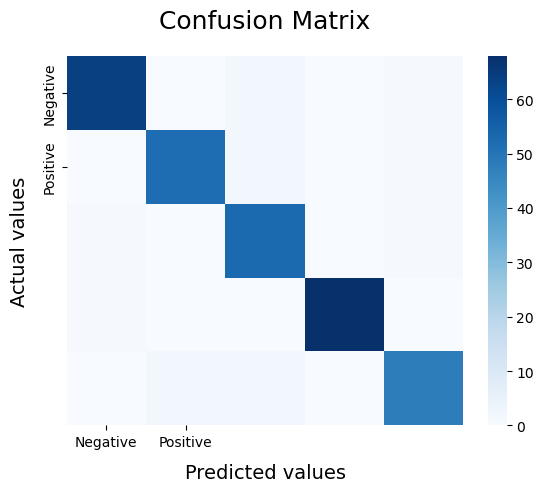

In [37]:
#Evaluation
model_Evaluate(y_cv, predicted_y)

### RandomForestClassifier

A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [38]:
from sklearn.datasets import make_classification

X = train_text_ohe
y = y_train

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X, y)

predicted_y = clf.predict(cv_text_ohe)

print(predicted_y)

['business' 'politics' 'sport' 'sport' 'sport' 'politics' 'tech'
 'business' 'business' 'politics' 'sport' 'business' 'business' 'business'
 'sport' 'business' 'politics' 'sport' 'sport' 'business' 'entertainment'
 'sport' 'tech' 'business' 'sport' 'sport' 'sport' 'politics' 'politics'
 'sport' 'tech' 'business' 'sport' 'sport' 'politics' 'sport' 'tech'
 'business' 'tech' 'sport' 'tech' 'sport' 'politics' 'politics' 'politics'
 'sport' 'sport' 'sport' 'business' 'business' 'tech' 'sport' 'sport'
 'tech' 'business' 'sport' 'politics' 'entertainment' 'tech' 'sport'
 'sport' 'business' 'business' 'business' 'business' 'politics' 'sport'
 'tech' 'sport' 'politics' 'business' 'business' 'business' 'sport'
 'politics' 'sport' 'tech' 'sport' 'business' 'tech' 'sport' 'tech'
 'sport' 'sport' 'sport' 'tech' 'sport' 'business' 'sport' 'sport' 'sport'
 'business' 'sport' 'sport' 'tech' 'politics' 'politics' 'sport'
 'politics' 'business' 'sport' 'sport' 'sport' 'sport' 'business' 'sport'
 'sport'

In [39]:
from sklearn.metrics import accuracy_score
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)
print(cv_accuracy)

72.14765100671141


               precision    recall  f1-score   support

     business       0.73      0.93      0.82        67
entertainment       1.00      0.20      0.33        55
     politics       0.91      0.71      0.80        55
        sport       0.56      1.00      0.72        69
         tech       0.94      0.65      0.77        52

     accuracy                           0.72       298
    macro avg       0.83      0.70      0.69       298
 weighted avg       0.81      0.72      0.69       298



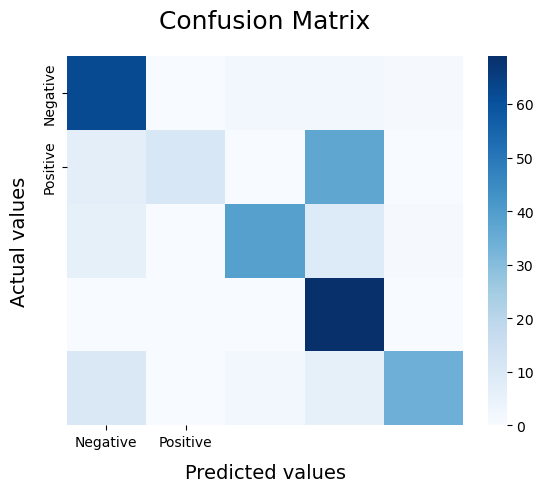

In [40]:
#Evaluation
model_Evaluate(y_cv, predicted_y)

### KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

X = train_text_ohe
y = y_train

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)

predicted_y = neigh.predict(cv_text_ohe)
print(predicted_y)

['sport' 'politics' 'sport' 'politics' 'entertainment' 'sport' 'sport'
 'business' 'sport' 'politics' 'politics' 'business' 'sport' 'politics'
 'politics' 'sport' 'sport' 'sport' 'sport' 'politics' 'sport' 'sport'
 'politics' 'politics' 'sport' 'politics' 'sport' 'politics' 'politics'
 'sport' 'politics' 'sport' 'sport' 'entertainment' 'sport' 'sport'
 'sport' 'politics' 'politics' 'sport' 'sport' 'politics' 'politics'
 'politics' 'politics' 'sport' 'sport' 'sport' 'politics' 'sport'
 'politics' 'sport' 'sport' 'politics' 'business' 'sport' 'politics'
 'entertainment' 'politics' 'sport' 'sport' 'sport' 'sport' 'politics'
 'politics' 'politics' 'sport' 'politics' 'sport' 'sport' 'sport' 'sport'
 'sport' 'sport' 'politics' 'sport' 'politics' 'sport' 'sport' 'sport'
 'sport' 'politics' 'sport' 'politics' 'sport' 'politics' 'sport'
 'politics' 'sport' 'sport' 'sport' 'sport' 'sport' 'sport' 'politics'
 'politics' 'politics' 'sport' 'sport' 'sport' 'sport' 'sport' 'sport'
 'sport' 'sport' '

In [42]:
from sklearn.metrics import accuracy_score
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)
print(cv_accuracy)

44.63087248322148


               precision    recall  f1-score   support

     business       1.00      0.22      0.37        67
entertainment       1.00      0.18      0.31        55
     politics       0.35      0.64      0.45        55
        sport       0.41      1.00      0.58        69
         tech       1.00      0.08      0.14        52

     accuracy                           0.45       298
    macro avg       0.75      0.42      0.37       298
 weighted avg       0.74      0.45      0.38       298



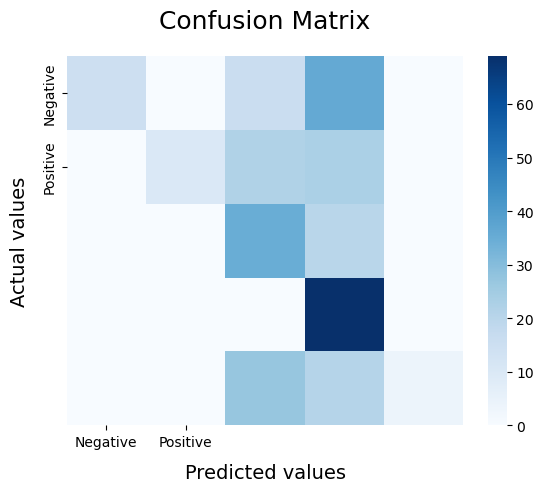

In [43]:
#Evaluation
model_Evaluate(y_cv, predicted_y)